In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
#importing training_dataset
training_dataset=pd.read_csv("new_Train.csv",dtype='object')

In [44]:
#training_dataset
training_dataset

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,duration
0,0,1,170,233,1.83,0.5,0.7,1,0,1,1,0.3,9.13,725.35
1,1,2,151,243,3.56,0.5,4.64,1,0,1,1,0.3,21.36,736.5
2,2,2,68,90,1.5,0.5,1.29,2,0,1,0,0.3,8.8,726.2833333333333
3,3,2,142,234,1.5,0.5,2.74,1,0,1,0,0.3,14.8,16.133333333333333
4,4,2,238,238,0,0.5,0.45,6,0,2,0,0.3,4.8,722.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048047,1048570,1,48,50,1,0.5,1.4,1,0,1,0.5,0.3,9.8,727.9166666666666
1048048,1048571,1,237,166,0,0.5,3.6,1,0,2,0,0.3,18.3,23.283333333333335
1048049,1048572,1,164,90,2.35,0.5,1.7,1,0,1,0.5,0.3,14.15,733.3666666666667
1048050,1048573,2,264,264,0,0.5,1.8,4,0,2,1,0.3,11.8,732.7833333333333


In [41]:
#dropping values in training_dataset
training_dataset.drop(['pickup+AF8-time','drop+AF8-time'],axis=1,inplace=True)
training_dataset.drop(['rate+AF8-code','stored+AF8-flag'],axis=1,inplace=True)

In [45]:
training_dataset.to_csv('Training.csv',header=True,index=False)

In [46]:
#creating new dataset
df=pd.read_csv('Training.csv',dtype='float64')

In [47]:
#displaying new dataset
df

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,duration
0,0.0,1.0,170.0,233.0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,0.3,9.13,725.350000
1,1.0,2.0,151.0,243.0,3.56,0.5,4.64,1.0,0.0,1.0,1.0,0.3,21.36,736.500000
2,2.0,2.0,68.0,90.0,1.50,0.5,1.29,2.0,0.0,1.0,0.0,0.3,8.80,726.283333
3,3.0,2.0,142.0,234.0,1.50,0.5,2.74,1.0,0.0,1.0,0.0,0.3,14.80,16.133333
4,4.0,2.0,238.0,238.0,0.00,0.5,0.45,6.0,0.0,2.0,0.0,0.3,4.80,722.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048047,1048570.0,1.0,48.0,50.0,1.00,0.5,1.40,1.0,0.0,1.0,0.5,0.3,9.80,727.916667
1048048,1048571.0,1.0,237.0,166.0,0.00,0.5,3.60,1.0,0.0,2.0,0.0,0.3,18.30,23.283333
1048049,1048572.0,1.0,164.0,90.0,2.35,0.5,1.70,1.0,0.0,1.0,0.5,0.3,14.15,733.366667
1048050,1048573.0,2.0,264.0,264.0,0.00,0.5,1.80,4.0,0.0,2.0,1.0,0.3,11.80,732.783333


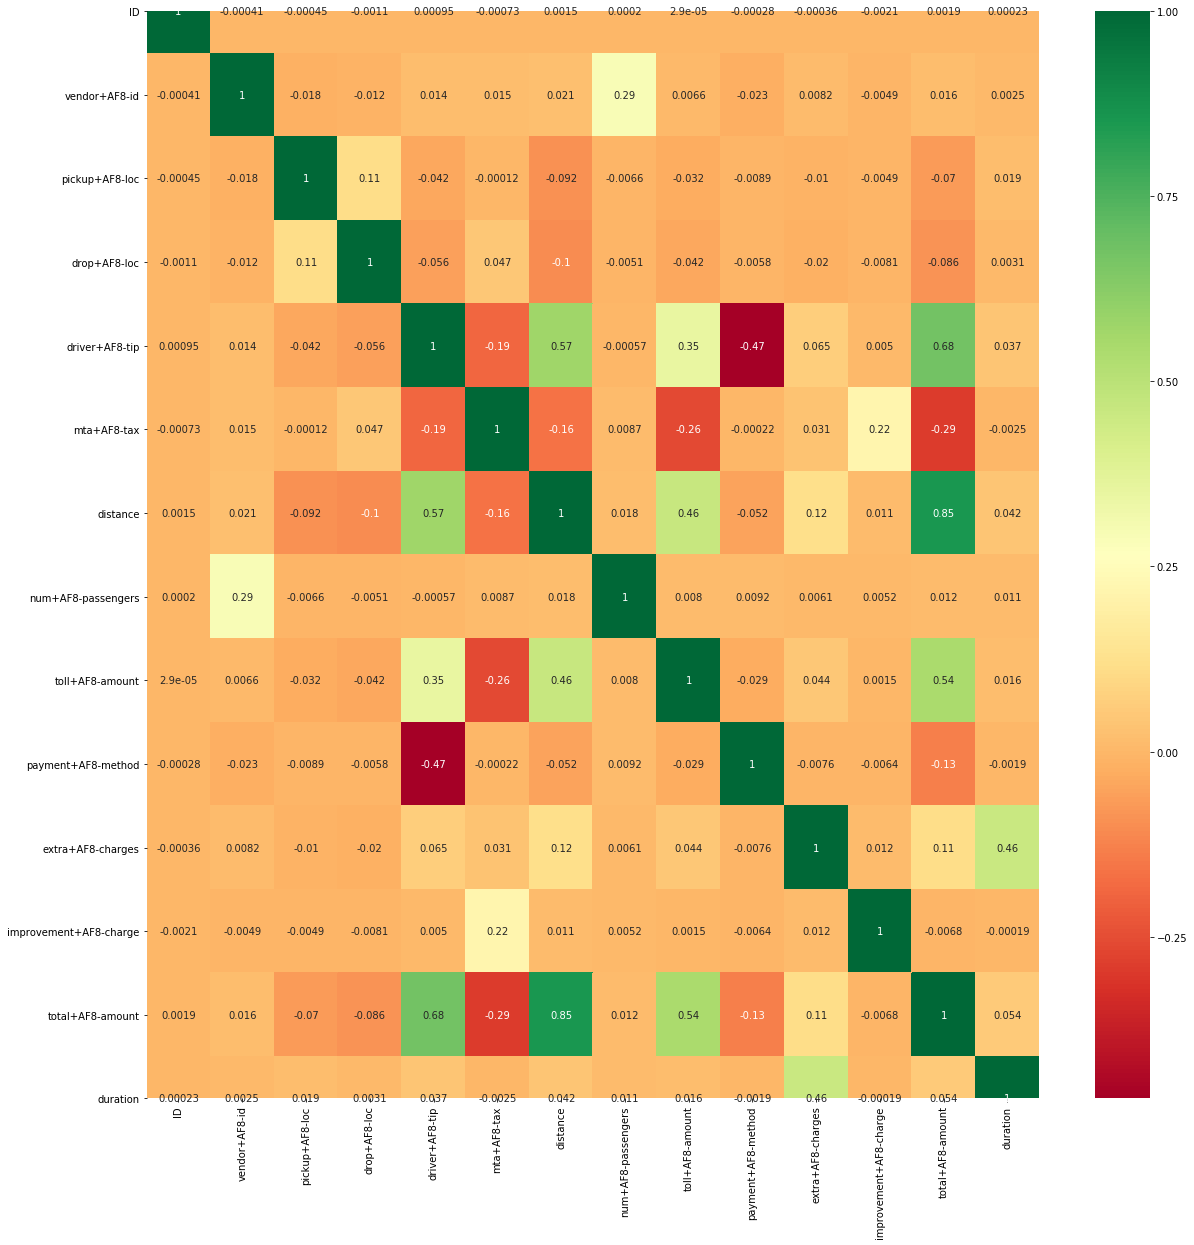

In [49]:
## Correlation
#get correlations of each features in new dataset of training_dataset
corrmat = df.corr()
top_corr_features = corrmat.index
top_corr_features
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
#number of missing values in each column
training_dataset.isna().sum()

ID                         0
vendor+AF8-id              0
pickup+AF8-loc             0
drop+AF8-loc               0
driver+AF8-tip             0
mta+AF8-tax                0
distance                   0
pickup+AF8-time            0
drop+AF8-time              0
num+AF8-passengers         0
toll+AF8-amount            0
payment+AF8-method         0
rate+AF8-code             25
stored+AF8-flag            0
extra+AF8-charges          0
improvement+AF8-charge     0
total+AF8-amount           0
duration                   0
dtype: int64

In [5]:
#size of training_dataset(number of samples,number of features)
training_dataset.shape

(1048052, 18)

In [6]:
#columns in training_dataset
training_dataset.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount',
       'duration'],
      dtype='object')

In [7]:
#description of training_dataset
training_dataset.describe()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,duration
count,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048052,1048027,1048052,1048052,1048052,1048052,1048052
unique,1048052,2,244,260,2135,2,3120,323704,326880,10,417,4,6,2,12,2,6060,12268
top,123921,2,237,161,0,0.5,0.9,04/05/2017 11:14:23 PM,04/05/2017 12:00:00 AM,1,0,1,1,N,0,0.3,7.8,727.05
freq,1,567245,46415,45994,350795,1042799,25533,16,38,774129,991052,723464,1019160,1040883,573404,1047768,24068,678


In [17]:
#function to drop samples with missing values


def unique_func(dataset,feature_name):
    count=0
    id=[]
    k=0
    for i in dataset['ID']:
        a=dataset[feature_name][int(i)]
        if math.isnan(float(a)):
            id.append(k)
            count+=1
        k+=1
    rows=dataset.index[id]
    dataset.drop(rows,inplace=True)
    return count

In [18]:
#dropping rows with missing values in training_dataset
a=unique_func(training_dataset,'driver+AF8-tip')
print(a)
a=unique_func(training_dataset,'mta+AF8-tax')
print(a)
a=unique_func(training_dataset,'distance')
print(a)
a=unique_func(training_dataset,'num+AF8-passengers')
print(a)
a=unique_func(training_dataset,'toll+AF8-amount')
print(a)
a=unique_func(training_dataset,'extra+AF8-charges')
print(a)
a=unique_func(training_dataset,'improvement+AF8-charge')
print(a)
a=unique_func(training_dataset,'total+AF8-amount')
print(a)
a=unique_func(training_dataset,'duration')
print(a)

14
493
0
0
0
3
13
0
0


In [19]:
#new shape of training_dataset
training_dataset.shape

(1048052, 18)

In [8]:
#function to check for mismatched values for columns containing floating values
def mismatched_values(dataset,feature_name):
    count=0
    total=0
    for i in range(dataset.shape[0]):
        a=dataset[feature_name][i]
        try:
            b=float(a)
            if math.isnan(b)==False:
                total+=1
        except:
            count+=1
            dataset[feature_name][i]=str(np.nan)
    return count,total

In [9]:
#dealing with mismatched values
a,b=mismatched_values(training_dataset,'pickup+AF8-loc')
a,b=mismatched_values(training_dataset,'drop+AF8-loc')
a,b=mismatched_values(training_dataset,'driver+AF8-tip')
a,b=mismatched_values(training_dataset,'mta+AF8-tax')
a,b=mismatched_values(training_dataset,'distance')
a,b=mismatched_values(training_dataset,'num+AF8-passengers')
a,b=mismatched_values(training_dataset,'toll+AF8-amount')
a,b=mismatched_values(training_dataset,'extra+AF8-charges')
a,b=mismatched_values(training_dataset,'improvement+AF8-charge')
a,b=mismatched_values(training_dataset,'total+AF8-amount')

In [10]:
#function to deal with mismatched values for categorical features
def mismatched_values_for_category(dataset,feature_name,llist):
    count=0
    total=0
    for i in range(dataset.shape[0]):
        a=dataset[feature_name][i]
        if a not in llist:
            #print(a)
            try:
                if math.isnan(float(a))==False:
                    dataset[feature_name][i]=str(np.nan)
            except:
                dataset[feature_name][i]=str(np.nan)
        total+=1
    return count,total

In [11]:
#ddealing with mismatched values for categorical columns in training_dataset
a,b=mismatched_values_for_category(training_dataset,'vendor+AF8-id',['1','2'])
print(a,b)
a,b=mismatched_values_for_category(training_dataset,'payment+AF8-method',['1','2','3','4','5','6'])
print(a,b)
a,b=mismatched_values_for_category(training_dataset, 'rate+AF8-code',['1','2','3','4','5','6'])
print(a,b)

0 1048575
0 1048575
0 1048575


In [15]:
#dropping null values
training_dataset=training_dataset.dropna()

In [16]:
#getting new shape of training_dataset
training_dataset.shape

(1048573, 17)

In [22]:
#plotting graph for categorical features
def plot_graph(dataset,feature_name,llist):
    freq=[]
    for i in llist:
        count=0
        for j in dataset['ID']:
            a=dataset[feature_name][int(j)]
            #print(a)
            if a==i:
                count+=1
        freq.append(count)
    print(llist)
    print(freq)
    plt.bar(llist,freq)
    plt.show()
    return sum(freq)

['1', '2']
[480807, 567245]


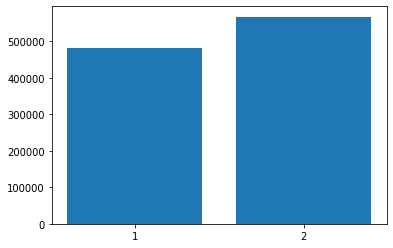

['1', '2', '3', '4', '5', '6']
[723464, 318346, 4886, 1356, 0, 0]


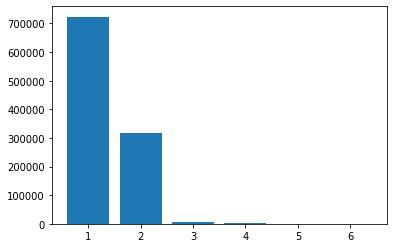

['1', '2', '3', '4', '5', '6']
[1019160, 22302, 2513, 628, 3415, 9]


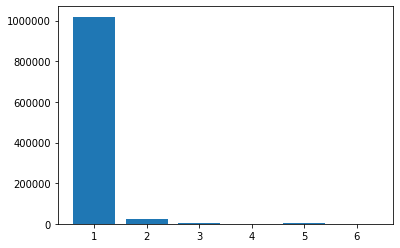

In [23]:
#plotting graph for categorical values
a=plot_graph(training_dataset,'vendor+AF8-id',['1','2'])
b=plot_graph(training_dataset,'payment+AF8-method',['1','2','3','4','5','6'])
c=plot_graph(training_dataset, 'rate+AF8-code',['1','2','3','4','5','6'])

In [27]:
print(a,b,c)

1048052 1048052 1048027


In [16]:
#function to get duration between date-time 
import datetime 
def get_duration(s1,s2):
    date1,time1,t1=s1.split(" ")
    m1,d1,h1=map(int,date1.split("/"))
    hr1,min1,sec1=map(int,time1.split(":"))
    if t1=="PM" and hr1!=12:
        hr1+=12
    if t1=="AM" and hr1==12:
        hr1=0
    #print(d1,m1,h1,hr1,min1,sec1)
    a = datetime.datetime(h1,m1,d1,hr1,min1,sec1)
    date2,time2,t2=s2.split(" ")
    m2,d2,h2=map(int,date2.split("/"))
    hr2,min2,sec2=map(int,time2.split(":"))
    if t2=="PM" and hr2!=12:
        h2+=12
    if t2=="AM" and hr2==12:
        hr2=0
    #print(d2,m2,h2,hr2,min2,sec2)
    b = datetime.datetime(h2,m2,d2,hr2,min2,sec2) 
    c=b-a
    minutes = c.seconds / 60
    return minutes

In [13]:
#creating new feature fron pickup date-time and drop date-time
time_duration=[]
for i in training_dataset['ID']:
    a=training_dataset['pickup+AF8-time'][int(i)]
    b=training_dataset['drop+AF8-time'][int(i)]
    #print(a,b)
    try:
        time_duration.append(get_duration(a,b))
    except:
        time_duration.append(str(np.nan))

In [14]:
#adding new column for drop and pick-up time
training_dataset['duration']=time_duration

In [15]:
#new training_dataset
training_dataset

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount,duration
0,0,1,170,233,1.83,0.5,0.7,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1,0,1,1,N,1,0.3,9.13,725.35
1,1,2,151,243,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1,0,1,1,N,1,0.3,21.36,736.5
2,2,2,68,90,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2,0,1,1,N,0,0.3,8.8,726.283
3,3,2,142,234,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1,0,1,1,N,0,0.3,14.8,16.1333
4,4,2,238,238,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6,0,2,1,N,0,0.3,4.8,722.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1,48,50,1,0.5,1.4,04/06/2017 11:17:09 PM,04/06/2017 11:25:04 PM,1,0,1,1,N,0.5,0.3,9.8,727.917
1048571,1048571,1,237,166,0,0.5,3.6,04/06/2017 10:58:47 AM,04/06/2017 11:22:04 AM,1,0,2,1,N,0,0.3,18.3,23.2833
1048572,1048572,1,164,90,2.35,0.5,1.7,04/06/2017 10:03:42 PM,04/06/2017 10:17:04 PM,1,0,1,1,N,0.5,0.3,14.15,733.367
1048573,1048573,2,264,264,0,0.5,1.8,04/06/2017 06:43:22 PM,04/06/2017 06:56:09 PM,4,0,2,1,N,1,0.3,11.8,732.783


In [8]:
#importing features and labels from training_dataset

X=training_dataset.iloc[:,[1,2,3,4,5,6,9,10,13,14,15,17]]
Y=training_dataset.iloc[:,16]

In [11]:
X

,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,num+AF8-passengers,toll+AF8-amount,extra+AF8-charges,improvement+AF8-charge,duration,2,Y
0,170,233,1.83,0.5,0.7,1,0,1,0.3,725.35,0,0
1,151,243,3.56,0.5,4.64,1,0,1,0.3,736.5,1,0
2,68,90,1.5,0.5,1.29,2,0,0,0.3,726.2833333333333,1,0
3,142,234,1.5,0.5,2.74,1,0,0,0.3,16.133333333333333,1,0
4,238,238,0,0.5,0.45,6,0,0,0.3,722.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048047,48,50,1,0.5,1.4,1,0,0.5,0.3,727.9166666666666,0,0
1048048,237,166,0,0.5,3.6,1,0,0,0.3,23.283333333333335,0,0
1048049,164,90,2.35,0.5,1.7,1,0,0.5,0.3,733.3666666666667,0,0
1048050,264,264,0,0.5,1.8,4,0,1,0.3,732.7833333333333,1,0


In [10]:
#creating new coluumns for categorical features
g=pd.get_dummies(X['vendor+AF8-id'],drop_first=True)
st=pd.get_dummies(X['stored+AF8-flag'],drop_first=True)
X=X.drop(['vendor+AF8-id','stored+AF8-flag'],axis=1)

X=pd.concat([X,g,st],axis=1)

In [12]:
#converting features and labels to arrays of floating type
X=np.array(X,dtype=np.float64)
Y=np.array(Y,dtype=np.float64)

In [98]:
#splitting of train set into training set and validation set
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

# predicting test set results

In [13]:
#prediction-phase
#importing testing-dataset
testing_dataset=pd.read_csv('test.csv')


In [19]:
testing_dataset

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,duration
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3,4.283333
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3,18.550000
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3,14.866667
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3,5.783333
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3,6.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154230,154230,2,234.0,161.0,2.56,0.5,1.47,04/05/2017 07:17:29 PM,04/05/2017 07:33:29 PM,6.0,0.0,1.0,1.0,N,1.0,0.3,736.000000
154231,154231,1,141.0,236.0,1.00,0.5,1.10,04/05/2017 01:02:10 PM,04/05/2017 01:09:10 PM,2.0,0.0,1.0,1.0,N,0.0,0.3,727.000000
154232,154232,2,239.0,151.0,1.56,0.5,1.26,04/06/2017 07:53:28 PM,04/06/2017 07:58:13 PM,1.0,0.0,1.0,1.0,N,1.0,0.3,724.750000
154233,154233,1,249.0,13.0,2.45,0.5,2.20,04/03/2017 10:52:58 AM,04/03/2017 11:06:20 AM,1.0,0.0,1.0,1.0,N,0.0,0.3,13.366667


In [17]:
#creating new feature in testing_dataset
time_duration=[]
for i in range(testing_dataset.shape[0]):
    a=testing_dataset['pickup_time'][i]
    b=testing_dataset['drop_time'][i]
    time_duration.append(get_duration(a,b))

In [18]:
testing_dataset['duration']=time_duration

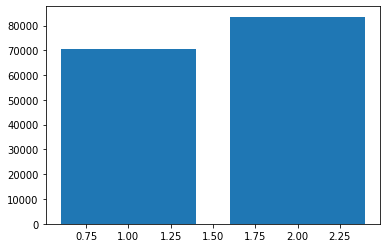

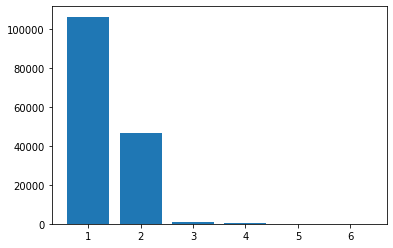

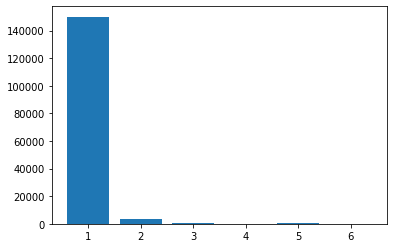

In [64]:
#plotting categorical features in testing_dataset
a=plot_graph(testing_dataset,'vendor_id',[1,2])
b=plot_graph(testing_dataset,'payment_method',[1,2,3,4,5,6])
c=plot_graph(testing_dataset, 'rate_code',[1,2,3,4,5,6])

In [65]:
print(a,b,c)

154235 154235 154234


In [20]:
#getting features from testing_dataset
X_test=testing_dataset.iloc[:,[1,2,3,4,5,6,9,10,13,14,15,16]]

In [25]:
#showing features imported
X_test

,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,extra_charges,improvement_charge,duration,2,Y
0,68.0,186.0,1.00,0.5,0.70,1.0,0.0,0.5,0.3,4.283333,0,0
1,170.0,161.0,2.55,0.5,1.00,1.0,0.0,0.0,0.3,18.550000,0,0
2,13.0,246.0,2.96,0.5,3.35,2.0,0.0,0.0,0.3,14.866667,1,0
3,170.0,233.0,2.00,0.5,0.80,2.0,0.0,0.0,0.3,5.783333,0,0
4,237.0,236.0,1.00,0.5,0.70,1.0,0.0,0.0,0.3,6.883333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
154230,234.0,161.0,2.56,0.5,1.47,6.0,0.0,1.0,0.3,736.000000,1,0
154231,141.0,236.0,1.00,0.5,1.10,2.0,0.0,0.0,0.3,727.000000,0,0
154232,239.0,151.0,1.56,0.5,1.26,1.0,0.0,1.0,0.3,724.750000,1,0
154233,249.0,13.0,2.45,0.5,2.20,1.0,0.0,0.0,0.3,13.366667,0,0


In [22]:
#creating dummy variables for categorical features in testing_dataset
v=pd.get_dummies(X_test['vendor_id'],drop_first=True)
st=pd.get_dummies(X_test['stored_flag'],drop_first=True)
#r=pd.get_dummies(X_test['rate+AF8-code'],drop_first=True)
X_test=X_test.drop(['vendor_id','stored_flag'],axis=1)

X_test=pd.concat([X_test,v,st],axis=1)

In [26]:
#changing testing data to floating value array
X_test=np.array(X_test,dtype=np.float64)

In [ ]:
#creating our model

# random forest model

In [36]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500,max_depth=10,max_features='log2',criterion='mse')
regressor.fit(X,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
(rmse=2.94250)
{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}


In [32]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['mse']
}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid=parameters,
                           n_jobs=-1,cv=5,verbose=3)

In [33]:
grid_search = grid_search.fit(X,Y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 330.2min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 675.9min finished


In [35]:
#best accuracy in grid search cv
best_accuracy

0.850216974842358

In [34]:
#best parameters in grid search cv
best_parameters

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}

In [46]:
#Making the predictions and evaluating the model
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'ID':pd.read_csv('test.csv').ID,'total_amount':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
predictions = regressor.predict(X_test)#give parameter for test.csv dataframe
make_submission(predictions[:],'submission_best.csv')

A submission file has been made


# XGBOOST

In [32]:
## Hyper Parameter Optimization for xgboost model

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "n_estimators":[100,500]
    
}

In [33]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [34]:
#applying xgboost model
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
regressor.fit(X,Y)

In [35]:
#applying randomised search cv
random_search=RandomizedSearchCV(regressor,param_distributions=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [36]:
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 56.3min finished


[21:37:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                            

In [37]:
#getting best estimator for xgboost model using randomised search cv
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
#getting best parameters for xgboost model using randomised search cv
random_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [27]:
#Making the predictions and evaluating the model
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'ID':pd.read_csv('test.csv').ID,'total_amount':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
predictions = regressor.predict(X_test)#give parameter for test.csv dataframe
make_submission(predictions[:],'submission_xgboost.csv')

# Multiple linear regression

In [140]:
#processing  model on training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
#Making the predictions and evaluating the model
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'ID':pd.read_csv('test.csv').ID,'total_amount':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')
X_test=np.array(X_test,dtype=np.float64)
predictions = regressor.predict(X_test)#give parameter for test.csv dataframe
make_submission(predictions[:],'submission_mlr.csv')#score-4.06470

A submission file has been made
